*name* : mahyar jahani nasab

# Setup Code


In [1]:
%load_ext autoreload
%autoreload 2

### Google Colab Setup


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# PyTorch

[PyTorch](https://pytorch.org/) is an open source machine learning framework. At its core, PyTorch provides a few key features:


To use PyTorch, we first need to import the `torch` package.


In [6]:
import torch
print(torch.__version__)

1.13.1+cu116


## Tensor Basics

### Creating and Accessing tensors

In [7]:
# Create a rank 1 tensor from a Python list
a = torch.tensor([1, 2, 3])
print('Here is a:')
print(a)
print('type(a): ', type(a))
print('rank of a: ', a.dim())
print('a.shape: ', a.shape)

# Access elements using square brackets
print()
print('a[0]: ', a[0])
print('type(a[0]): ', type(a[0]))
print('type(a[0].item()): ', type(a[0].item()))

# Mutate elements using square brackets
a[1] = 10
print()
print('a after mutating:')
print(a)

Here is a:
tensor([1, 2, 3])
type(a):  <class 'torch.Tensor'>
rank of a:  1
a.shape:  torch.Size([3])

a[0]:  tensor(1)
type(a[0]):  <class 'torch.Tensor'>
type(a[0].item()):  <class 'int'>

a after mutating:
tensor([ 1, 10,  3])


The example above shows a one-dimensional tensor; we can similarly create tensors with two or more dimensions:

In [8]:
# Create a two-dimensional tensor
b = torch.tensor([[1, 2, 3], [4, 5, 5]])
print('Here is b:')
print(b)
print('rank of b:', b.dim())
print('b.shape: ', b.shape)

# Access elements from a multidimensional tensor
print()
print('b[0, 1]:', b[0, 1])
print('b[1, 2]:', b[1, 2])

# Mutate elements of a multidimensional tensor
b[1, 1] = 100
print()
print('b after mutating:')
print(b)

Here is b:
tensor([[1, 2, 3],
        [4, 5, 5]])
rank of b: 2
b.shape:  torch.Size([2, 3])

b[0, 1]: tensor(2)
b[1, 2]: tensor(5)

b after mutating:
tensor([[  1,   2,   3],
        [  4, 100,   5]])


In [9]:

# Create a sample tensor
x = create_sample_tensor()
print('Here is the sample tensor:')
print(x)

# Mutate the tensor by setting a few elements
indices = [(0, 0), (1, 0), (1, 1)]
values = [4, 5, 6]
mutate_tensor(x, indices, values)
print('\nAfter mutating:')
print(x)
print('\nCorrect shape: ', x.shape == (3, 2))
print('x[0, 0] correct: ', x[0, 0].item() == 4)
print('x[1, 0] correct: ', x[1, 0].item() == 5)
print('x[1, 1] correct: ', x[1, 1].item() == 6)

# Check the number of elements in the sample tensor
num = count_tensor_elements(x)
print('\nNumber of elements in x: ', num)
print('Correctly counted: ', num == 6)

Here is the sample tensor:
tensor([[  0.,  10.],
        [100.,   0.],
        [  0.,   0.]])

After mutating:
tensor([[ 4., 10.],
        [ 5.,  6.],
        [ 0.,  0.]])

Correct shape:  True
x[0, 0] correct:  True
x[1, 0] correct:  True
x[1, 1] correct:  True

Number of elements in x:  6
Correctly counted:  True


### Tensor constructors


- [`torch.zeros`](https://pytorch.org/docs/1.1.0/torch.html#torch.zeros): Creates a tensor of all zeros
- [`torch.ones`](https://pytorch.org/docs/1.1.0/torch.html#torch.ones): Creates a tensor of all ones
- [`torch.rand`](https://pytorch.org/docs/1.1.0/torch.html#torch.rand): Creates a tensor with uniform random numbers

In [10]:
# Create a tensor of all zeros
a = torch.zeros(2, 3)
print('tensor of zeros:')
print(a)

# Create a tensor of all ones
b = torch.ones(1, 2)
print('\ntensor of ones:')
print(b)

# Create a 3x3 identity matrix
c = torch.eye(3)
print('\nidentity matrix:')
print(c)

# Tensor of random values
d = torch.rand(4, 5)
print('\nrandom tensor:')
print(d)

tensor of zeros:
tensor([[0., 0., 0.],
        [0., 0., 0.]])

tensor of ones:
tensor([[1., 1.]])

identity matrix:
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

random tensor:
tensor([[0.2847, 0.2951, 0.1298, 0.4984, 0.9979],
        [0.0910, 0.2098, 0.4047, 0.4827, 0.6833],
        [0.9683, 0.8740, 0.0171, 0.9357, 0.0462],
        [0.8734, 0.4581, 0.6211, 0.8356, 0.7395]])


In [11]:

x = create_tensor_of_pi(4, 5)

print('x is a tensor:', torch.is_tensor(x))
print('x has correct shape: ', x.shape == (4, 5))
print('x is filled with sevens: ', (x == 3.14).all().item() == 1)

x is a tensor: True
x has correct shape:  True
x is filled with sevens:  True


### Datatypes

PyTorch provides a [large set of numeric datatypes](https://pytorch.org/docs/stable/tensor_attributes.html#torch.torch.dtype) that you can use to construct tensors. PyTorch tries to guess a datatype when you create a tensor; functions that construct tensors typically have a `dtype` argument that you can use to explicitly specify a datatype.

In [12]:
# Let torch choose the datatype
x0 = torch.tensor([1, 2])   # List of integers
x1 = torch.tensor([1., 2.]) # List of floats
x2 = torch.tensor([1., 2])  # Mixed list
print('dtype when torch chooses for us:')
print('List of integers:', x0.dtype)
print('List of floats:', x1.dtype)
print('Mixed list:', x2.dtype)

# Force a particular datatype
y0 = torch.tensor([1, 2], dtype=torch.float32)  # 32-bit float
y1 = torch.tensor([1, 2], dtype=torch.int32)    # 32-bit (signed) integer
y2 = torch.tensor([1, 2], dtype=torch.int64)    # 64-bit (signed) integer
print('\ndtype when we force a datatype:')
print('32-bit float: ', y0.dtype)
print('32-bit integer: ', y1.dtype)
print('64-bit integer: ', y2.dtype)

# Other creation ops also take a dtype argument
z0 = torch.ones(1, 2)  # Let torch choose for us
z1 = torch.ones(1, 2, dtype=torch.int16) # 16-bit (signed) integer
z2 = torch.ones(1, 2, dtype=torch.uint8) # 8-bit (unsigned) integer
print('\ntorch.ones with different dtypes')
print('default dtype:', z0.dtype)
print('16-bit integer:', z1.dtype)
print('8-bit unsigned integer:', z2.dtype)

dtype when torch chooses for us:
List of integers: torch.int64
List of floats: torch.float32
Mixed list: torch.float32

dtype when we force a datatype:
32-bit float:  torch.float32
32-bit integer:  torch.int32
64-bit integer:  torch.int64

torch.ones with different dtypes
default dtype: torch.float32
16-bit integer: torch.int16
8-bit unsigned integer: torch.uint8


In [13]:
x0 = torch.eye(3, dtype=torch.int64)
x1 = x0.float()  # Cast to 32-bit float
x2 = x0.double() # Cast to 64-bit float
x3 = x0.to(torch.float32) # Alternate way to cast to 32-bit float
x4 = x0.to(torch.float64) # Alternate way to cast to 64-bit float
print('x0:', x0.dtype)
print('x1:', x1.dtype)
print('x2:', x2.dtype)
print('x3:', x3.dtype)
print('x4:', x4.dtype)

x0: torch.int64
x1: torch.float32
x2: torch.float64
x3: torch.float32
x4: torch.float64


In [14]:
x0 = torch.eye(3, dtype=torch.float64)  # Shape (3, 3), dtype torch.float64
x1 = torch.zeros_like(x0)               # Shape (3, 3), dtype torch.float64
x2 = x0.new_zeros(4, 5)                 # Shape (4, 5), dtype torch.float64
x3 = torch.ones(6, 7).to(x0)            # Shape (6, 7), dtype torch.float64)
print('x0 shape is %r, dtype is %r' % (x0.shape, x0.dtype))
print('x1 shape is %r, dtype is %r' % (x1.shape, x1.dtype))
print('x2 shape is %r, dtype is %r' % (x2.shape, x2.dtype))
print('x3 shape is %r, dtype is %r' % (x3.shape, x3.dtype))

x0 shape is torch.Size([3, 3]), dtype is torch.float64
x1 shape is torch.Size([3, 3]), dtype is torch.float64
x2 shape is torch.Size([4, 5]), dtype is torch.float64
x3 shape is torch.Size([6, 7]), dtype is torch.float64


In [15]:

start = 5
stop = 25
x = multiples_of_ten(start, stop)
print('Correct dtype: ', x.dtype == torch.float64)
print('Correct shape: ', x.shape == (2,))
print('Correct values: ', x.tolist() == [10, 20])

# If there are no multiples of ten in the given range you should return an empty tensor
start = 5
stop = 7
x = multiples_of_ten(start, stop)
print('\nCorrect dtype: ', x.dtype == torch.float64)
print('Correct shape: ', x.shape == (0,))

Correct dtype:  True
Correct shape:  True
Correct values:  True

Correct dtype:  True
Correct shape:  True


## Tensor indexing

### Slice indexing

In [16]:
a = torch.tensor([0, 11, 22, 33, 44, 55, 66])
print(0, a)        # (0) Original tensor
print(1, a[2:5])   # (1) Elements between index 2 and 5
print(2, a[2:])    # (2) Elements after index 2
print(3, a[:5])    # (3) Elements before index 5
print(4, a[:])     # (4) All elements
print(5, a[1:5:2]) # (5) Every second element between indices 1 and 5
print(6, a[:-1])   # (6) All but the last element
print(7, a[-4::2]) # (7) Every second element, starting from the fourth-last

0 tensor([ 0, 11, 22, 33, 44, 55, 66])
1 tensor([22, 33, 44])
2 tensor([22, 33, 44, 55, 66])
3 tensor([ 0, 11, 22, 33, 44])
4 tensor([ 0, 11, 22, 33, 44, 55, 66])
5 tensor([11, 33])
6 tensor([ 0, 11, 22, 33, 44, 55])
7 tensor([33, 55])


In [17]:
# Create the following rank 2 tensor with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = torch.tensor([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print('Original tensor:')
print(a)
print('shape: ', a.shape)

# Get row 1, and all columns. 
print('\nSingle row:')
print(a[1, :])
print(a[1])  # Gives the same result; we can omit : for trailing dimensions
print('shape: ', a[1].shape)

print('\nSingle column:')
print(a[:, 1])
print('shape: ', a[:, 1].shape)

# Get the first two rows and the last three columns
print('\nFirst two rows, last two columns:')
print(a[:2, -3:])
print('shape: ', a[:2, -3:].shape)

# Get every other row, and columns at index 1 and 2
print('\nEvery other row, middle columns:')
print(a[::2, 1:3])
print('shape: ', a[::2, 1:3].shape)

Original tensor:
tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])
shape:  torch.Size([3, 4])

Single row:
tensor([5, 6, 7, 8])
tensor([5, 6, 7, 8])
shape:  torch.Size([4])

Single column:
tensor([ 2,  6, 10])
shape:  torch.Size([3])

First two rows, last two columns:
tensor([[2, 3, 4],
        [6, 7, 8]])
shape:  torch.Size([2, 3])

Every other row, middle columns:
tensor([[ 2,  3],
        [10, 11]])
shape:  torch.Size([2, 2])


In [18]:
# Create the following rank 2 tensor with shape (3, 4)
a = torch.tensor([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print('Original tensor')
print(a)

row_r1 = a[1, :]    # Rank 1 view of the second row of a  
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
print('\nTwo ways of accessing a single row:')
print(row_r1, row_r1.shape)
print(row_r2, row_r2.shape)

# We can make the same distinction when accessing columns::
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print('\nTwo ways of accessing a single column:')
print(col_r1, col_r1.shape)
print(col_r2, col_r2.shape)

Original tensor
tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])

Two ways of accessing a single row:
tensor([5, 6, 7, 8]) torch.Size([4])
tensor([[5, 6, 7, 8]]) torch.Size([1, 4])

Two ways of accessing a single column:
tensor([ 2,  6, 10]) torch.Size([3])
tensor([[ 2],
        [ 6],
        [10]]) torch.Size([3, 1])


In [19]:
# Create a tensor, a slice, and a clone of a slice
a = torch.tensor([[1, 2, 3, 4], [5, 6, 7, 8]])
b = a[0, 1:]
c = a[0, 1:].clone()
print('Before mutating:')
print(a)
print(b)
print(c)

a[0, 1] = 20  # a[0, 1] and b[0] point to the same element
b[1] = 30     # b[1] and a[0, 2] point to the same element
c[2] = 40     # c is a clone, so it has its own data
print('\nAfter mutating:')
print(a)
print(b)
print(c)

print(a.storage().data_ptr() == c.storage().data_ptr())

Before mutating:
tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])
tensor([2, 3, 4])
tensor([2, 3, 4])

After mutating:
tensor([[ 1, 20, 30,  4],
        [ 5,  6,  7,  8]])
tensor([20, 30,  4])
tensor([ 2,  3, 40])
False


In [20]:
# We will use this helper function to check your results
def check(orig, actual, expected):
    if not torch.is_tensor(actual):
        return False
    expected = torch.tensor(expected)
    same_elements = (actual == expected).all().item()
    same_storage = (orig.storage().data_ptr() == actual.storage().data_ptr())
    return same_elements and same_storage

In [76]:

# Create the following rank 2 tensor of shape (3, 5)
# [[ 1  2  3  4  5]
#  [ 6  7  8  9 10]
#  [11 12 13 14 15]]
x = torch.tensor([[1, 2, 3, 4, 5], [6, 7, 8, 8, 10], [11, 12, 13, 14, 15]])
out = slice_indexing_practice(x)

last_row = out[0]
print('last_row:')
print(last_row)
correct = check(x, last_row, [11, 12, 13, 14, 15])
print('Correct: %r\n' % correct)

third_col = out[1]
print('third_col:')
print(third_col)
correct = check(x, third_col, [[3], [8], [13]])
print('Correct: %r\n' % correct)

first_two_rows_three_cols = out[2]
print('first_two_rows_three_cols:')
print(first_two_rows_three_cols)
correct = check(x, first_two_rows_three_cols, [[1, 2, 3], [6, 7, 8]])
print('Correct: %r\n' % correct)

even_rows_odd_cols = out[3]
print('even_rows_odd_cols:')
print(even_rows_odd_cols)
correct = check(x, even_rows_odd_cols, [[2, 4], [12, 14]])
print('Correct: %r\n' % correct)

last_row:
tensor([11, 12, 13, 14, 15])
Correct: True

third_col:
tensor([[ 3],
        [ 8],
        [13]])
Correct: True

first_two_rows_three_cols:
tensor([[1, 2, 3],
        [6, 7, 8]])
Correct: True

even_rows_odd_cols:
tensor([[ 2,  4],
        [12, 14]])
Correct: True



In [22]:
a = torch.zeros(2, 4, dtype=torch.int64)
a[:, :2] = 1
a[:, 2:] = torch.tensor([[2, 3], [4, 5]])
print(a)

tensor([[1, 1, 2, 3],
        [1, 1, 4, 5]])


In [23]:

x = torch.zeros(5, 7, dtype=torch.int64)
print('Here is x before calling slice_assignment_practice:')
print(x)
slice_assignment_practice(x)
print('Here is x after calling slice assignment practice:')
print(x)

expected = [
    [0, 1, 2, 2, 2, 2, 0],
    [0, 1, 2, 2, 2, 2, 0],
    [3, 4, 3, 4, 5, 5, 0],
    [3, 4, 3, 4, 5, 5, 0],
    [0, 0, 0, 0, 0, 0, 0],
]
print('Correct: ', x.tolist() == expected)

Here is x before calling slice_assignment_practice:
tensor([[0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0]])
Here is x after calling slice assignment practice:
tensor([[0, 1, 2, 2, 2, 2, 0],
        [0, 1, 2, 2, 2, 2, 0],
        [3, 4, 3, 4, 5, 5, 0],
        [3, 4, 3, 4, 5, 5, 0],
        [0, 0, 0, 0, 0, 0, 0]])
Correct:  True


### Integer tensor indexing

In [24]:
# Create the following rank 2 tensor with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = torch.tensor([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
print('Original tensor:')
print(a)

# Create a new tensor of shape (5, 4) by reordering rows from a:
# - First two rows same as the first row of a
# - Third row is the same as the last row of a
# - Fourth and fifth rows are the same as the second row from a
idx = [0, 0, 2, 1, 1]  # index arrays can be Python lists of integers
print('\nReordered rows:')
print(a[idx])

# Create a new tensor of shape (3, 4) by reversing the columns from a
idx = torch.tensor([3, 2, 1, 0])  # Index arrays can be int64 torch tensors
print('\nReordered columns:')
print(a[:, idx])

Original tensor:
tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])

Reordered rows:
tensor([[ 1,  2,  3,  4],
        [ 1,  2,  3,  4],
        [ 9, 10, 11, 12],
        [ 5,  6,  7,  8],
        [ 5,  6,  7,  8]])

Reordered columns:
tensor([[ 4,  3,  2,  1],
        [ 8,  7,  6,  5],
        [12, 11, 10,  9]])


In [25]:
a = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print('Original tensor:')
print(a)

idx = [0, 1, 2]
print('\nGet the diagonal:')
print(a[idx, idx])

# Modify the diagonal
a[idx, idx] = torch.tensor([11, 22, 33])
print('\nAfter setting the diagonal:')
print(a)

Original tensor:
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

Get the diagonal:
tensor([1, 5, 9])

After setting the diagonal:
tensor([[11,  2,  3],
        [ 4, 22,  6],
        [ 7,  8, 33]])


One useful trick with integer array indexing is selecting or mutating one element from each row or column of a matrix:

In [26]:
# Create a new tensor from which we will select elements
a = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
print('Original tensor:')
print(a)

# Take on element from each row of a:
# from row 0, take element 1;
# from row 1, take element 2;
# from row 2, take element 1;
# from row 3, take element 0
idx0 = torch.arange(a.shape[0])  # Quick way to build [0, 1, 2, 3]
idx1 = torch.tensor([1, 2, 1, 0])
print('\nSelect one element from each row:')
print(a[idx0, idx1])

# Now set each of those elements to zero
a[idx0, idx1] = 0
print('\nAfter modifying one element from each row:')
print(a)

Original tensor:
tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]])

Select one element from each row:
tensor([ 2,  6,  8, 10])

After modifying one element from each row:
tensor([[ 1,  0,  3],
        [ 4,  5,  0],
        [ 7,  0,  9],
        [ 0, 11, 12]])


In [27]:

# Build a tensor of shape (4, 3):
# [[ 1,  2,  3],
#  [ 4,  5,  6],
#  [ 7,  8,  9],
#  [10, 11, 12]]
x = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
print('Here is x:')
print(x)

y1 = shuffle_cols(x)
print('\nHere is shuffle_cols(x):')
print(y1)
expected = [[1, 1, 3, 2], [4, 4, 6, 5], [7, 7, 9, 8], [10, 10, 12, 11]]
y1_correct = torch.is_tensor(y1) and y1.tolist() == expected
print('Correct: %r\n' % y1_correct)

y2 = reverse_rows(x)
print('Here is reverse_rows(x):')
print(y2)
expected = [[10, 11, 12], [7, 8, 9], [4, 5, 6], [1, 2, 3]]
y2_correct = torch.is_tensor(y2) and y2.tolist() == expected
print('Correct: %r\n' % y2_correct)

y3 = take_one_elem_per_col(x)
print('Here is take_one_elem_per_col(x):')
print(y3)
expected = [4, 2, 12]
y3_correct = torch.is_tensor(y3) and y3.tolist() == expected
print('Correct: %r' % y3_correct)

Here is x:
tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]])

Here is shuffle_cols(x):
tensor([[ 1,  1,  3,  2],
        [ 4,  4,  6,  5],
        [ 7,  7,  9,  8],
        [10, 10, 12, 11]])
Correct: True

Here is reverse_rows(x):
tensor([[10, 11, 12],
        [ 7,  8,  9],
        [ 4,  5,  6],
        [ 1,  2,  3]])
Correct: True

Here is take_one_elem_per_col(x):
tensor([ 4.,  2., 12.])
Correct: True


### Boolean tensor indexing

In [28]:
a = torch.tensor([[1,2], [3, 4], [5, 6]])
print('Original tensor:')
print(a)

# Find the elements of a that are bigger than 3. The mask has the same shape as
# a, where each element of mask tells whether the corresponding element of a
# is greater than three.
mask = (a > 3)
print('\nMask tensor:')
print(mask)

# We can use the mask to construct a rank-1 tensor containing the elements of a
# that are selected by the mask
print('\nSelecting elements with the mask:')
print(a[mask])

# We can also use boolean masks to modify tensors; for example this sets all
# elements <= 3 to zero:
a[a <= 3] = 0
print('\nAfter modifying with a mask:')
print(a)

Original tensor:
tensor([[1, 2],
        [3, 4],
        [5, 6]])

Mask tensor:
tensor([[False, False],
        [False,  True],
        [ True,  True]])

Selecting elements with the mask:
tensor([4, 5, 6])

After modifying with a mask:
tensor([[0, 0],
        [0, 4],
        [5, 6]])


In [29]:
# Make a few test cases
torch.manual_seed(598)
x0 = torch.tensor([[-1, -1, 0], [0, 1, 2], [3, 4, 5]])
x1 = torch.tensor([0, 1, 2, 3])
x2 = torch.randn(100, 100)
print('Correct for x0: ', count_negative_entries(x0) == 2)
print('Correct for x1: ', count_negative_entries(x1) == 0)
print('Correct for x2: ', count_negative_entries(x2) == 4984)

Correct for x0:  True
Correct for x1:  True
Correct for x2:  True


In [30]:


def check_one_hot(x, y):
    C = y.shape[1]
    for i, n in enumerate(x):
        if n >= C: return False
        for j in range(C):
            expected = 1.0 if j == n else 0.0
            if y[i, j].item() != expected: return False
        return True
      
x0 = [1, 4, 3, 2]
y0 = make_one_hot(x0)
print('Here is y0:')
print(y0)
print('y0 correct: ', check_one_hot(x0, y0))

x1 = [1, 3, 5, 7, 6, 2]
y1 = make_one_hot(x1)
print('\nHere is y1:')
print(y1)
print('y1 correct: ', check_one_hot(x1, y1))

Here is y0:
tensor([[0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0.]])
y0 correct:  True

Here is y1:
tensor([[0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0.]])
y1 correct:  True


## Reshaping operations

### View

In [31]:
x0 = torch.tensor([[1, 2, 3, 4], [5, 6, 7, 8]])
print('Original tensor:')
print(x0)
print('shape:', x0.shape)

# Flatten x0 into a rank 1 vector of shape (8,)
x1 = x0.view(8)
print('\nFlattened tensor:')
print(x1)
print('shape:', x1.shape)

# Convert x1 to a rank 2 "row vector" of shape (1, 8)
x2 = x1.view(1, 8)
print('\nRow vector:')
print(x2)
print('shape:', x2.shape)

# Convert x1 to a rank 2 "column vector" of shape (8, 1)
x3 = x1.view(8, 1)
print('\nColumn vector:')
print(x3)
print('shape:', x3.shape)

# Convert x1 to a rank 3 tensor of shape (2, 2, 2):
x4 = x1.view(2, 2, 2)
print('\nRank 3 tensor:')
print(x4)
print('shape:', x4.shape)

Original tensor:
tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])
shape: torch.Size([2, 4])

Flattened tensor:
tensor([1, 2, 3, 4, 5, 6, 7, 8])
shape: torch.Size([8])

Row vector:
tensor([[1, 2, 3, 4, 5, 6, 7, 8]])
shape: torch.Size([1, 8])

Column vector:
tensor([[1],
        [2],
        [3],
        [4],
        [5],
        [6],
        [7],
        [8]])
shape: torch.Size([8, 1])

Rank 3 tensor:
tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])
shape: torch.Size([2, 2, 2])


In [32]:
# We can reuse these functions for tensors of different shapes
def flatten(x):
    return x.view(-1)

def make_row_vec(x):
    return x.view(1, -1)

x0 = torch.tensor([[1, 2, 3], [4, 5, 6]])
x0_flat = flatten(x0)
x0_row = make_row_vec(x0)
print('x0:')
print(x0)
print('x0_flat:')
print(x0_flat)
print('x0_row:')
print(x0_row)

x1 = torch.tensor([[1, 2], [3, 4]])
x1_flat = flatten(x1)
x1_row = make_row_vec(x1)
print('\nx1:')
print(x1)
print('x1_flat:')
print(x1_flat)
print('x1_row:')
print(x1_row)

x0:
tensor([[1, 2, 3],
        [4, 5, 6]])
x0_flat:
tensor([1, 2, 3, 4, 5, 6])
x0_row:
tensor([[1, 2, 3, 4, 5, 6]])

x1:
tensor([[1, 2],
        [3, 4]])
x1_flat:
tensor([1, 2, 3, 4])
x1_row:
tensor([[1, 2, 3, 4]])


As its name implies, a tensor returned by `.view()` shares the same data as the input, so changes to one will affect the other and vice-versa:

In [33]:
x = torch.tensor([[1, 2, 3], [4, 5, 6]])
x_flat = x.view(-1)
print('x before modifying:')
print(x)
print('x_flat before modifying:')
print(x_flat)

x[0, 0] = 10   # x[0, 0] and x_flat[0] point to the same data
x_flat[1] = 20 # x_flat[1] and x[0, 1] point to the same data

print('\nx after modifying:')
print(x)
print('x_flat after modifying:')
print(x_flat)

x before modifying:
tensor([[1, 2, 3],
        [4, 5, 6]])
x_flat before modifying:
tensor([1, 2, 3, 4, 5, 6])

x after modifying:
tensor([[10, 20,  3],
        [ 4,  5,  6]])
x_flat after modifying:
tensor([10, 20,  3,  4,  5,  6])


### Swapping axes

In [34]:
x = torch.tensor([[1, 2, 3], [4, 5, 6]])
print('Original matrix:')
print(x)
print('\nTransposing with view DOES NOT WORK!')
print(x.view(3, 2))
print('\nTransposed matrix:')
print(torch.t(x))
print(x.t())

Original matrix:
tensor([[1, 2, 3],
        [4, 5, 6]])

Transposing with view DOES NOT WORK!
tensor([[1, 2],
        [3, 4],
        [5, 6]])

Transposed matrix:
tensor([[1, 4],
        [2, 5],
        [3, 6]])
tensor([[1, 4],
        [2, 5],
        [3, 6]])


For tensors with more than two dimensions, we can use the function [`torch.transpose`](https://pytorch.org/docs/stable/generated/torch.transpose.html#torch.transpose) to swap arbitrary dimensions, or the [`.permute`](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.permute) method to arbitrarily permute dimensions:

In [35]:
# Create a tensor of shape (2, 3, 4)
x0 = torch.tensor([
     [[1,  2,  3,  4],
      [5,  6,  7,  8],
      [9, 10, 11, 12]],
     [[13, 14, 15, 16],
      [17, 18, 19, 20],
      [21, 22, 23, 24]]])
print('Original tensor:')
print(x0)
print('shape:', x0.shape)

# Swap axes 1 and 2; shape is (2, 4, 3)
x1 = x0.transpose(1, 2)
print('\nSwap axes 1 and 2:')
print(x1)
print(x1.shape)

# Permute axes; the argument (1, 2, 0) means:
# - Make the old dimension 1 appear at dimension 0;
# - Make the old dimension 2 appear at dimension 1;
# - Make the old dimension 0 appear at dimension 2
# This results in a tensor of shape (3, 4, 2)
x2 = x0.permute(1, 2, 0)
print('\nPermute axes')
print(x2)
print('shape:', x2.shape)

Original tensor:
tensor([[[ 1,  2,  3,  4],
         [ 5,  6,  7,  8],
         [ 9, 10, 11, 12]],

        [[13, 14, 15, 16],
         [17, 18, 19, 20],
         [21, 22, 23, 24]]])
shape: torch.Size([2, 3, 4])

Swap axes 1 and 2:
tensor([[[ 1,  5,  9],
         [ 2,  6, 10],
         [ 3,  7, 11],
         [ 4,  8, 12]],

        [[13, 17, 21],
         [14, 18, 22],
         [15, 19, 23],
         [16, 20, 24]]])
torch.Size([2, 4, 3])

Permute axes
tensor([[[ 1, 13],
         [ 2, 14],
         [ 3, 15],
         [ 4, 16]],

        [[ 5, 17],
         [ 6, 18],
         [ 7, 19],
         [ 8, 20]],

        [[ 9, 21],
         [10, 22],
         [11, 23],
         [12, 24]]])
shape: torch.Size([3, 4, 2])


### Contiguous tensors

In [36]:
x0 = torch.randn(2, 3, 4)

try:
  # This sequence of reshape operations will crash
  x1 = x0.transpose(1, 2).view(8, 3)
except RuntimeError as e:
  print(type(e), e)
  
# We can solve the problem using either .contiguous() or .reshape()
x1 = x0.transpose(1, 2).contiguous().view(8, 3)
x2 = x0.transpose(1, 2).reshape(8, 3)
print('x1 shape: ', x1.shape)
print('x2 shape: ', x2.shape)

<class 'RuntimeError'> view size is not compatible with input tensor's size and stride (at least one dimension spans across two contiguous subspaces). Use .reshape(...) instead.
x1 shape:  torch.Size([8, 3])
x2 shape:  torch.Size([8, 3])


In [37]:

x = torch.arange(24)
print('Here is x:')
print(x)
y = reshape_practice(x)
print('Here is y:')
print(y)

expected = [
    [0, 1,  2,  3, 12, 13, 14, 15],
    [4, 5,  6,  7, 16, 17, 18, 19],
    [8, 9, 10, 11, 20, 21, 22, 23]]
print('Correct:', y.tolist() == expected)

Here is x:
tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23])
Here is y:
tensor([[ 0,  1,  2,  3, 12, 13, 14, 15],
        [ 4,  5,  6,  7, 16, 17, 18, 19],
        [ 8,  9, 10, 11, 20, 21, 22, 23]])
Correct: True


## Tensor operations
So far we have seen how to construct, access, and reshape tensors. But one of the most important reasons to use tensors is for performing computation! PyTorch provides many different operations to perform computations on tensors.

### Elementwise operations

Basic mathematical functions operate elementwise on tensors, and are available as operator overloads, as functions in the `torch` module, and as instance methods on torch objects; all produce the same results:

In [38]:
x = torch.tensor([[1, 2, 3, 4]], dtype=torch.float32)
y = torch.tensor([[5, 6, 7, 8]], dtype=torch.float32)

# Elementwise sum; all give the same result
print('Elementwise sum:')
print(x + y)
print(torch.add(x, y))
print(x.add(y))

# Elementwise difference
print('\nElementwise difference:')
print(x - y)
print(torch.sub(x, y))
print(x.sub(y))

# Elementwise product
print('\nElementwise product:')
print(x * y)
print(torch.mul(x, y))
print(x.mul(y))

# Elementwise division
print('\nElementwise division')
print(x / y)
print(torch.div(x, y))
print(x.div(y))

# Elementwise power
print('\nElementwise power')
print(x ** y)
print(torch.pow(x, y))
print(x.pow(y))

Elementwise sum:
tensor([[ 6.,  8., 10., 12.]])
tensor([[ 6.,  8., 10., 12.]])
tensor([[ 6.,  8., 10., 12.]])

Elementwise difference:
tensor([[-4., -4., -4., -4.]])
tensor([[-4., -4., -4., -4.]])
tensor([[-4., -4., -4., -4.]])

Elementwise product:
tensor([[ 5., 12., 21., 32.]])
tensor([[ 5., 12., 21., 32.]])
tensor([[ 5., 12., 21., 32.]])

Elementwise division
tensor([[0.2000, 0.3333, 0.4286, 0.5000]])
tensor([[0.2000, 0.3333, 0.4286, 0.5000]])
tensor([[0.2000, 0.3333, 0.4286, 0.5000]])

Elementwise power
tensor([[1.0000e+00, 6.4000e+01, 2.1870e+03, 6.5536e+04]])
tensor([[1.0000e+00, 6.4000e+01, 2.1870e+03, 6.5536e+04]])
tensor([[1.0000e+00, 6.4000e+01, 2.1870e+03, 6.5536e+04]])


In [39]:
x = torch.tensor([[1, 2, 3, 4]], dtype=torch.float32)

print('Square root:')
print(torch.sqrt(x))
print(x.sqrt())

print('\nTrig functions:')
print(torch.sin(x))
print(x.sin())
print(torch.cos(x))
print(x.cos())

Square root:
tensor([[1.0000, 1.4142, 1.7321, 2.0000]])
tensor([[1.0000, 1.4142, 1.7321, 2.0000]])

Trig functions:
tensor([[ 0.8415,  0.9093,  0.1411, -0.7568]])
tensor([[ 0.8415,  0.9093,  0.1411, -0.7568]])
tensor([[ 0.5403, -0.4161, -0.9900, -0.6536]])
tensor([[ 0.5403, -0.4161, -0.9900, -0.6536]])


### Reduction operations

In [40]:
x = torch.tensor([[1, 2, 3], 
                  [4, 5, 6]], dtype=torch.float32)
print('Original tensor:')
print(x)

print('\nSum over entire tensor:')
print(torch.sum(x))
print(x.sum())

# We can sum over each row:
print('\nSum of each row:')
print(torch.sum(x, dim=0))
print(x.sum(dim=0))

# Sum over each column:
print('\nSum of each column:')
print(torch.sum(x, dim=1))
print(x.sum(dim=1))

Original tensor:
tensor([[1., 2., 3.],
        [4., 5., 6.]])

Sum over entire tensor:
tensor(21.)
tensor(21.)

Sum of each row:
tensor([5., 7., 9.])
tensor([5., 7., 9.])

Sum of each column:
tensor([ 6., 15.])
tensor([ 6., 15.])


In [41]:
x = torch.tensor([[2, 4, 3, 5], [3, 3, 5, 2]], dtype=torch.float32)
print('Original tensor:')
print(x, x.shape)

# Finding the overall minimum only returns a single value
print('\nOverall minimum: ', x.min())

# Compute the minimum along each column; we get both the value and location:
# The minimum of the first column is 2, and it appears at index 0;
# the minimum of the second column is 3 and it appears at index 1; etc
col_min_vals, col_min_idxs = x.min(dim=0)
print('\nMinimum along each column:')
print('values:', col_min_vals)
print('idxs:', col_min_idxs)

# Compute the minimum along each row; we get both the value and the minimum
row_min_vals, row_min_idxs = x.min(dim=1)
print('\nMinimum along each row:')
print('values:', row_min_vals)
print('idxs:', row_min_idxs)

Original tensor:
tensor([[2., 4., 3., 5.],
        [3., 3., 5., 2.]]) torch.Size([2, 4])

Overall minimum:  tensor(2.)

Minimum along each column:
values: tensor([2., 3., 3., 2.])
idxs: tensor([0, 1, 0, 1])

Minimum along each row:
values: tensor([2., 2.])
idxs: tensor([0, 3])


In [42]:
# Create a tensor of shape (128, 10, 3, 64, 64)
x = torch.randn(128, 10, 3, 64, 64)
print(x.shape)

# Take the mean over dimension 1; shape is now (128, 3, 64, 64)
x = x.mean(dim=1)
print(x.shape)

# Take the sum over dimension 2; shape is now (128, 3, 64)
x = x.sum(dim=2)
print(x.shape)

# Take the mean over dimension 1, but keep the dimension from being eliminated
# by passing keepdim=True; shape is now (128, 1, 64)
x = x.mean(dim=1, keepdim=True)
print(x.shape)

torch.Size([128, 10, 3, 64, 64])
torch.Size([128, 3, 64, 64])
torch.Size([128, 3, 64])
torch.Size([128, 1, 64])


In [43]:
x0 = torch.tensor([[10, 20, 30], [2, 5, 1]])
print('Here is x0:')
print(x0)
y0 = zero_row_min(x0)
print('Here is y0:')
print(y0)
expected = [[0, 20, 30], [2, 5, 0]]
y0_correct = torch.is_tensor(y0) and y0.tolist() == expected
print('y0 correct: ', y0_correct)

x1 = torch.tensor([[2, 5, 10, -1], [1, 3, 2, 4], [5, 6, 2, 10]])
print('\nHere is x1:')
print(x1)
y1 = zero_row_min(x1)
print('Here is y1:')
print(y1)
expected = [[2, 5, 10, 0], [0, 3, 2, 4], [5, 6, 0, 10]]
y1_correct = torch.is_tensor(y1) and y1.tolist() == expected
print('y1 correct: ', y1_correct)

Here is x0:
tensor([[10, 20, 30],
        [ 2,  5,  1]])
Here is y0:
tensor([[ 0, 20, 30],
        [ 2,  5,  0]])
y0 correct:  True

Here is x1:
tensor([[ 2,  5, 10, -1],
        [ 1,  3,  2,  4],
        [ 5,  6,  2, 10]])
Here is y1:
tensor([[ 2,  5, 10,  0],
        [ 0,  3,  2,  4],
        [ 5,  6,  0, 10]])
y1 correct:  True


### Matrix operations

In [44]:
v = torch.tensor([9,10], dtype=torch.float32)
w = torch.tensor([11, 12], dtype=torch.float32)

# Inner product of vectors
print('Dot products:')
print(torch.dot(v, w))
print(v.dot(w))

# dot only works for vectors -- it will give an error for tensors of rank > 1
x = torch.tensor([[1,2],[3,4]], dtype=torch.float32)
y = torch.tensor([[5,6],[7,8]], dtype=torch.float32)
try:
  print(x.dot(y))
except RuntimeError as e:
  print(e)
  
# Instead we use mm for matrix-matrix products:
print('\nMatrix-matrix product:')
print(torch.mm(x, y))
print(x.mm(y))

Dot products:
tensor(219.)
tensor(219.)
1D tensors expected, but got 2D and 2D tensors

Matrix-matrix product:
tensor([[19., 22.],
        [43., 50.]])
tensor([[19., 22.],
        [43., 50.]])


In [45]:
print('Here is x (rank 2):')
print(x)
print('\nHere is v (rank 1):')
print(v)

# Matrix-vector multiply with torch.mv produces a rank-1 output
print('\nMatrix-vector product with torch.mv (rank 1 output)')
print(torch.mv(x, v))
print(x.mv(v))

# We can reshape the vector to have rank 2 and use torch.mm to perform
# matrix-vector products, but the result will have rank 2
print('\nMatrix-vector product with torch.mm (rank 2 output)')
print(torch.mm(x, v.view(2, 1)))
print(x.mm(v.view(2, 1)))

print('\nMatrix-vector product with torch.matmul (rank 1 output)')
print(torch.matmul(x, v))
print(x.matmul(v))

Here is x (rank 2):
tensor([[1., 2.],
        [3., 4.]])

Here is v (rank 1):
tensor([ 9., 10.])

Matrix-vector product with torch.mv (rank 1 output)
tensor([29., 67.])
tensor([29., 67.])

Matrix-vector product with torch.mm (rank 2 output)
tensor([[29.],
        [67.]])
tensor([[29.],
        [67.]])

Matrix-vector product with torch.matmul (rank 1 output)
tensor([29., 67.])
tensor([29., 67.])


In [46]:
B, N, M, P = 2, 3, 5, 4
x = torch.randn(B, N, M)
y = torch.randn(B, M, P)
z_expected = torch.stack([x[0] @ y[0], x[1] @ y[1]])

# The two may not return exactly the same result; different linear algebra
# routines often return slightly different results due to the fact that
# floating-point math is non-exact and non-associative.
z1 = batched_matrix_multiply(x, y, use_loop=True)
z1_diff = (z1 - z_expected).abs().max().item()
print('z1 difference: ', z1_diff)
print('z1 difference within tolerance: ', z1_diff < 1e-6)

z2 = batched_matrix_multiply(x, y, use_loop=False)
z2_diff = (z2 - z_expected).abs().max().item()
print('\nz2 difference: ', z2_diff)
print('z2 difference within tolerance: ', z2_diff < 1e-6)

z1 difference:  0.0
z1 difference within tolerance:  True

z2 difference:  2.384185791015625e-07
z2 difference within tolerance:  True


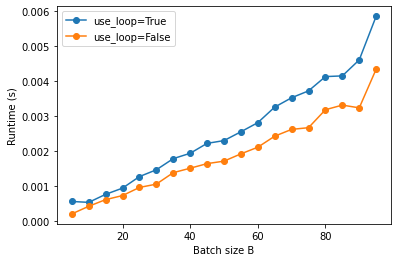

In [47]:
import time
import matplotlib.pyplot as plt

N, M, P = 100, 100, 100
loop_times = []
no_loop_times = []
Bs = list(range(5, 100, 5))
num_trials = 20
for B in Bs:
    loop_trials = []
    no_loop_trials = []
    for trial in range(num_trials):
        x = torch.randn(B, N, M)
        y = torch.randn(B, M, P)
        t0 = time.time()
        z1 = batched_matrix_multiply(x, y, use_loop=True)
        t1 = time.time()
        z2 = batched_matrix_multiply(x, y, use_loop=False)
        t2 = time.time()
        loop_trials.append(t1 - t0)
        no_loop_trials.append(t2 - t1)
    loop_mean = torch.tensor(loop_trials).mean().item()
    no_loop_mean = torch.tensor(no_loop_trials).mean().item()
    loop_times.append(loop_mean)
    no_loop_times.append(no_loop_mean)
    
plt.plot(Bs, loop_times, 'o-', label='use_loop=True')
plt.plot(Bs, no_loop_times, 'o-', label='use_loop=False')
plt.xlabel('Batch size B')
plt.ylabel('Runtime (s)')
plt.legend()
plt.show()

## Broadcasting

In [48]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = torch.tensor([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = torch.tensor([1, 0, 1])
y = torch.zeros_like(x)   # Create an empty matrix with the same shape as x

# Add the vector v to each row of the matrix x with an explicit loop
for i in range(4):
    y[i, :] = x[i, :] + v

print(y)

tensor([[ 2,  2,  4],
        [ 5,  5,  7],
        [ 8,  8, 10],
        [11, 11, 13]])


In [49]:
vv = v.repeat((4, 1))  # Stack 4 copies of v on top of each other
print(vv)              # Prints "[[1 0 1]
                       #          [1 0 1]
                       #          [1 0 1]
                       #          [1 0 1]]"

tensor([[1, 0, 1],
        [1, 0, 1],
        [1, 0, 1],
        [1, 0, 1]])


In [50]:
y = x + vv  # Add x and vv elementwise
print(y)

tensor([[ 2,  2,  4],
        [ 5,  5,  7],
        [ 8,  8, 10],
        [11, 11, 13]])


In [51]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = torch.tensor([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = torch.tensor([1, 0, 1])
y = x + v  # Add v to each row of x using broadcasting
print(y)

tensor([[ 2,  2,  4],
        [ 5,  5,  7],
        [ 8,  8, 10],
        [11, 11, 13]])


In [52]:
x = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
v = torch.tensor([1, 0, 1])
print('Here is x (before broadcasting):')
print(x)
print('x.shape: ', x.shape)
print('\nHere is v (before broadcasting):')
print(v)
print('v.shape: ', v.shape)

xx, vv = torch.broadcast_tensors(x, v)
print('Here is xx (after) broadcasting):')
print(xx)
print('xx.shape: ', x.shape)
print('\nHere is vv (after broadcasting):')
print(vv)
print('vv.shape: ', vv.shape)

Here is x (before broadcasting):
tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]])
x.shape:  torch.Size([4, 3])

Here is v (before broadcasting):
tensor([1, 0, 1])
v.shape:  torch.Size([3])
Here is xx (after) broadcasting):
tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]])
xx.shape:  torch.Size([4, 3])

Here is vv (after broadcasting):
tensor([[1, 0, 1],
        [1, 0, 1],
        [1, 0, 1],
        [1, 0, 1]])
vv.shape:  torch.Size([4, 3])


In [53]:
# Compute outer product of vectors
v = torch.tensor([1, 2, 3])  # v has shape (3,)
w = torch.tensor([4, 5])     # w has shape (2,)
# To compute an outer product, we first reshape v to be a column
# vector of shape (3, 1); we can then broadcast it against w to yield
# an output of shape (3, 2), which is the outer product of v and w:
print(v.view(3, 1) * w)

tensor([[ 4,  5],
        [ 8, 10],
        [12, 15]])


We can add a vector to each row of a matrix:

In [54]:
x = torch.tensor([[1, 2, 3], [4, 5, 6]])  # x has shape (2, 3)
v = torch.tensor([1, 2, 3])               # v has shape (3,)
print('Here is the matrix:')
print(x)
print('\nHere is the vector:')
print(v)

# x has shape (2, 3) and v has shape (3,) so they broadcast to (2, 3),
# giving the following matrix:
print('\nAdd the vector to each row of the matrix:')
print(x + v)

Here is the matrix:
tensor([[1, 2, 3],
        [4, 5, 6]])

Here is the vector:
tensor([1, 2, 3])

Add the vector to each row of the matrix:
tensor([[2, 4, 6],
        [5, 7, 9]])


In [55]:
x = torch.tensor([[1, 2, 3], [4, 5, 6]])  # x has shape (2, 3)
w = torch.tensor([4, 5])                  # w has shape (2,)
print('Here is the matrix:')
print(x)
print('\nHere is the vector:')
print(w)

# x has shape (2, 3) and w has shape (2,). We reshape w to (2, 1);
# then when we add the two the result broadcasts to (2, 3):
print('\nAdd the vector to each column of the matrix:')
print(x + w.view(-1, 1))

# Another solution is the following:
# 1. Transpose x so it has shape (3, 2)
# 2. Since w has shape (2,), adding will broadcast to (3, 2)
# 3. Transpose the result, resulting in a shape (2, 3)
print((x.t() + w).t())

Here is the matrix:
tensor([[1, 2, 3],
        [4, 5, 6]])

Here is the vector:
tensor([4, 5])

Add the vector to each column of the matrix:
tensor([[ 5,  6,  7],
        [ 9, 10, 11]])
tensor([[ 5,  6,  7],
        [ 9, 10, 11]])


Multiply a tensor by a set of constants:

In [56]:
x = torch.tensor([[1, 2, 3], [4, 5, 6]])  # x has shape (2, 3)
c = torch.tensor([1, 10, 11, 100])        # c has shape (4)
print('Here is the matrix:')
print(x)
print('\nHere is the vector:')
print(c)

# We do the following:
# 1. Reshape c from (4,) to (4, 1, 1)
# 2. x has shape (2, 3). Since they have different ranks, when we multiply the
#    two, x behaves as if its shape were (1, 2, 3)
# 3. The result of the broadcast multiplication between tensor of shape
#    (4, 1, 1) and (1, 2, 3) has shape (4, 2, 3)
# 4. The result y has shape (4, 2, 3), and y[i] (shape (2, 3)) is equal to
#    c[i] * x
y = c.view(-1, 1, 1) * x
print('\nMultiply x by a set of constants:')
print(y)

Here is the matrix:
tensor([[1, 2, 3],
        [4, 5, 6]])

Here is the vector:
tensor([  1,  10,  11, 100])

Multiply x by a set of constants:
tensor([[[  1,   2,   3],
         [  4,   5,   6]],

        [[ 10,  20,  30],
         [ 40,  50,  60]],

        [[ 11,  22,  33],
         [ 44,  55,  66]],

        [[100, 200, 300],
         [400, 500, 600]]])


In [66]:
x = torch.tensor([[0., 30., 600.], [1., 10., 200.], [-1., 20., 400.]])
y = normalize_columns(x)
print('Here is x:')
print(x)
print('Here is y:')
print(y)

x_expected = [[0., 30., 600.], [1., 10., 200.], [-1., 20., 400.]]
y_expected = [[0., 1., 1.], [1., -1., -1.], [-1., 0., 0.]]
y_correct = y.tolist() == y_expected
x_correct = x.tolist() == x_expected
print('y correct: ', y_correct)
print('x unchanged: ', x_correct)

Here is x:
tensor([[  0.,  30., 600.],
        [  1.,  10., 200.],
        [ -1.,  20., 400.]])
Here is y:
tensor([[ 0.,  1.,  1.],
        [ 1., -1., -1.],
        [-1.,  0.,  0.]])
y correct:  True
x unchanged:  True


In [58]:
# Out-of-place addition creates and returns a new tensor without modifying the inputs:
x = torch.tensor([1, 2, 3])
y = torch.tensor([3, 4, 5])
print('Out-of-place addition:')
print('Before addition:')
print('x: ', x)
print('y: ', y)
z = x.add(y)  # Same as z = x + y or z = torch.add(x, y)
print('\nAfter addition (x and y unchanged):')
print('x: ', x)
print('y: ', y)
print('z: ', z)
print('z is x: ', z is x)
print('z is y: ', z is y)

# In-place addition modifies the input tensor:
print('\n\nIn-place Addition:')
print('Before addition:')
print('x: ', x)
print('y: ', y)
x.add_(y)  # Same as x += y or torch.add(x, y, out=x)
print('\nAfter addition (x is modified):')
print('x: ', x)
print('y: ', y)
print('z: ', z)
print('z is x: ', z is x)
print('z is y: ', z is y)

Out-of-place addition:
Before addition:
x:  tensor([1, 2, 3])
y:  tensor([3, 4, 5])

After addition (x and y unchanged):
x:  tensor([1, 2, 3])
y:  tensor([3, 4, 5])
z:  tensor([4, 6, 8])
z is x:  False
z is y:  False


In-place Addition:
Before addition:
x:  tensor([1, 2, 3])
y:  tensor([3, 4, 5])

After addition (x is modified):
x:  tensor([4, 6, 8])
y:  tensor([3, 4, 5])
z:  tensor([4, 6, 8])
z is x:  False
z is y:  False


## Running on GPU

In [59]:
import torch

if torch.cuda.is_available:
  print('PyTorch can use GPUs!')
else:
  print('PyTorch cannot use GPUs.')

PyTorch can use GPUs!


In [60]:
# Construct a tensor on the CPU
x0 = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32)
print('x0 device:', x0.device)

# Move it to the GPU using .to()
x1 = x0.to('cuda')
print('x1 device:', x1.device)

# Move it to the GPU using .cuda()
x2 = x0.cuda()
print('x2 device:', x2.device)

# Move it back to the CPU using .to()
x3 = x1.to('cpu')
print('x3 device:', x3.device)

# Move it back to the CPU using .cpu()
x4 = x2.cpu()
print('x4 device:', x4.device)

# We can construct tensors directly on the GPU as well
y = torch.tensor([[1, 2, 3], [4, 5, 6]], dtype=torch.float64, device='cuda')
print('y device / dtype:', y.device, y.dtype)

# Calling x.to(y) where y is a tensor will return a copy of x with the same
# device and dtype as y
x5 = x0.to(y)
print('x5 device / dtype:', x5.device, x5.dtype)

x0 device: cpu
x1 device: cuda:0
x2 device: cuda:0
x3 device: cpu
x4 device: cpu
y device / dtype: cuda:0 torch.float64
x5 device / dtype: cuda:0 torch.float64


In [61]:
import time

a_cpu = torch.randn(10000, 10000, dtype=torch.float32)
b_cpu = torch.randn(10000, 10000, dtype=torch.float32)

a_gpu = a_cpu.cuda()
b_gpu = b_cpu.cuda()
torch.cuda.synchronize()

t0 = time.time()
c_cpu = a_cpu + b_cpu
t1 = time.time()
c_gpu = a_gpu + b_gpu
torch.cuda.synchronize()
t2 = time.time()

# Check that they computed the same thing
diff = (c_gpu.cpu() - c_cpu).abs().max().item()
print('Max difference between c_gpu and c_cpu:', diff)

cpu_time = 1000.0 * (t1 - t0)
gpu_time = 1000.0 * (t2 - t1)
print('CPU time: %.2f ms' % cpu_time)
print('GPU time: %.2f ms' % gpu_time)
print('GPU speedup: %.2f x' % (cpu_time / gpu_time))

Max difference between c_gpu and c_cpu: 0.0
CPU time: 221.75 ms
GPU time: 13.07 ms
GPU speedup: 16.97 x


In [64]:
import time

x = torch.rand(512, 4096)
w = torch.rand(4096, 4096)

t0 = time.time()
y0 = mm_on_cpu(x, w)
t1 = time.time()

y1 = mm_on_gpu(x, w)
torch.cuda.synchronize()
t2 = time.time()

print('y1 on CPU:', y1.device == torch.device('cpu'))
diff = (y0 - y1).abs().max().item()
print('Max difference between y0 and y1:', diff)
print('Difference within tolerance:', diff < 5e-2)

cpu_time = 1000.0 * (t1 - t0)
gpu_time = 1000.0 * (t2 - t1)
print('CPU time: %.2f ms' % cpu_time)
print('GPU time: %.2f ms' % gpu_time)
print('GPU speedup: %.2f x' % (cpu_time / gpu_time))

y1 on CPU: True
Max difference between y0 and y1: 0.001220703125
Difference within tolerance: True
CPU time: 225.47 ms
GPU time: 28.70 ms
GPU speedup: 7.86 x
